## ***INTELLIGENCE IN BIOLOGICAL SYSTEMS-2-[22BIO211]***

## **END SEMISTER PROJECT**

## **Batch-B**

### **MC DHANUSH      -[CB.EN.U4AIE22139]**



## **TOPIC:**
## **Drug Response Prediction using Logistic & Random Forest Regression**

## **1. Importing Required Libraries**

In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt


## **2. Loading the Dataset**

In [6]:
data = pd.read_csv("PANCANCER_ANOVA_Preprocessed.csv")


## **3. Understanding the Data**

In [7]:
data.shape

(200920, 20)

In [8]:
data.head()

,Drug name,Drug ID,Drug target,Target Pathway,Feature Name,n_feature_pos,n_feature_neg,ic50_effect_size,log_ic50_mean_pos,log_ic50_mean_neg,feature_ic50_t_pval,feature_delta_mean_ic50,feature_pos_ic50_var,feature_neg_ic50_var,feature_pval,tissue_pval,msi_pval,fdr,Tissue Type,Screening Set
0,73,-1.535951,165,7,0,-0.343261,0.974287,1.448962,-1.768609,-2.176244,-1.222666,1.928038,0.494846,0.999705,-1.348527,-0.05763,-0.839597,-0.524564,0,0
1,73,-1.535951,165,7,1,-0.507105,1.030056,0.566544,-2.482964,-2.166890,0.027389,-1.616561,1.362291,0.996551,1.339069,-0.05763,-0.837479,0.850272,0,0
2,73,-1.535951,165,7,2,-0.434285,1.005269,-0.448762,-2.072630,-2.170429,0.431462,0.410572,0.333428,1.008753,1.291244,-0.05763,-0.837483,0.835802,0,0
3,73,-1.535951,165,7,3,-0.579925,1.054842,3.469465,-1.432841,-2.171400,-0.343689,3.549139,1.703362,0.993222,-0.590413,-0.05763,-0.838159,-0.032559,0,0
4,73,-1.535951,165,7,4,-0.234031,0.937107,-1.022714,-2.165906,-2.169692,1.355314,-0.049901,0.133200,1.022239,-0.152675,-0.05763,-0.837866,0.307882,0,0


In [9]:
data.nunique() # Displays total number of unique elements in each column.


Drug name                     288
Drug ID                       297
Drug target                   186
Target Pathway                 25
Feature Name                  692
n_feature_pos                 448
n_feature_neg                 758
ic50_effect_size           194701
log_ic50_mean_pos          194701
log_ic50_mean_neg          194701
feature_ic50_t_pval        194683
feature_delta_mean_ic50    194701
feature_pos_ic50_var       194701
feature_neg_ic50_var       194701
feature_pval               194695
tissue_pval                 17468
msi_pval                   194700
fdr                         31808
Tissue Type                     1
Screening Set                   1
dtype: int64

## **4. Selecting Relevant Features**

In [10]:
selected_features = ['Drug target', 'Target Pathway', 'Feature Name', 'ic50_effect_size', 'log_ic50_mean_pos', 'log_ic50_mean_neg']
X = data[selected_features].copy()
y = data['Drug name']


Relevant features are selected and stored in X, while the target variable ('Drug name') is stored in y.

## **5. Encoding Categorical Variables**

In [11]:
encoder_features = LabelEncoder()
encoder_drug_name = LabelEncoder()

for col in X.select_dtypes(include=['object']).columns:
    X[col] = encoder_features.fit_transform(X[col])

y = encoder_drug_name.fit_transform(y)


Categorical features and the target variable are encoded into numerical values using LabelEncoder

## **6. Normalizing Numerical Features**

In [12]:
scaler = StandardScaler()
numerical_cols = X.select_dtypes(include=[np.number]).columns
X[numerical_cols] = scaler.fit_transform(X[numerical_cols])


Numerical features are normalized using StandardScaler to standardize the data.

## **7. Splitting the Dataset**

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

print("Training set count:", len(X_train))
print("Testing set count:", len(X_test))


Training set count: 120552
Testing set count: 80368


The dataset is split into training and testing sets with a 60-40 ratio using train_test_split.

## **8. Training and Evaluating Logistic Regression Model**

In [14]:
logistic_model = LogisticRegression(max_iter=1000, random_state=42)
logistic_model.fit(X_train, y_train)

y_pred_logistic = logistic_model.predict(X_test)
accuracy_logistic = accuracy_score(y_test, y_pred_logistic)
print("Logistic Regression Model Accuracy:", accuracy_logistic)


Logistic Regression Model Accuracy: 0.7751592673700975


## **9. Training and Evaluating Random Forest Model**

In [15]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Random Forest Model Accuracy:", accuracy_rf)


Random Forest Model Accuracy: 0.997013736810671


## **10. Cross-Validation**

In [16]:
cv_scores = cross_val_score(rf_model, X, y, cv=5)
print("Cross-validation scores:", cv_scores)
print("Mean cross-validation score:", np.mean(cv_scores))


Cross-validation is performed on the random forest model to evaluate its performance more  vigorously.

## **11. Confusion Matrix and Classification Report**

In [ ]:
cm = confusion_matrix(y_test, y_pred_rf)
print("Confusion Matrix:\n", cm)

class_names = [str(cls) for cls in encoder_drug_name.classes_]
report = classification_report(y_test, y_pred_rf, target_names=class_names)
print("Classification Report:\n", report)


Confusion Matrix:
 [[255   0   0 ...   0   0   0]
 [  0 277   0 ...   0   0   0]
 [  0   0 289 ...   0   0   0]
 ...
 [  0   0   0 ... 280   0   0]
 [  0   0   0 ...   0 269   0]
 [  0   0   0 ...   0   0 275]]
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.91      0.92       280
           1       0.96      0.93      0.94       299
           2       0.99      1.00      0.99       289
           3       1.00      1.00      1.00       292
           4       1.00      1.00      1.00       271
           5       0.92      0.95      0.94       282
           6       0.98      0.97      0.97       272
           7       0.99      1.00      1.00       275
           8       0.98      0.99      0.99       285
           9       0.97      0.97      0.97       256
          10       0.97      0.98      0.97       251
          11       1.00      0.99      1.00       286
          12       1.00      1.00      1.00       304
        

A confusion matrix and classification report are generated to provide more detailed evaluation metrics for the random forest model

## **12. Feature Importance**

Feature ranking:
1. feature 5 (0.3633798555090039) - log_ic50_mean_neg
2. feature 0 (0.3091026202651877) - Drug target
3. feature 1 (0.18556015724068856) - Target Pathway
4. feature 4 (0.10638770037250411) - log_ic50_mean_pos
5. feature 3 (0.025587394013231197) - ic50_effect_size
6. feature 2 (0.009982272599384556) - Feature Name


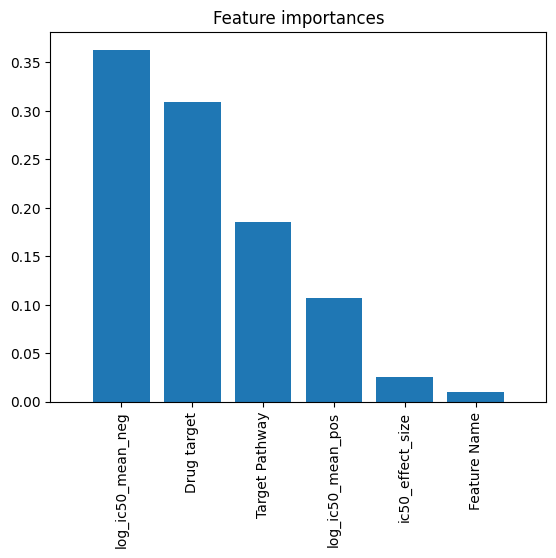

In [ ]:
importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]

print("Feature ranking:")
for f in range(X.shape[1]):
    print(f"{f + 1}. feature {indices[f]} ({importances[indices[f]]}) - {selected_features[indices[f]]}")

plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), [selected_features[i] for i in indices], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.show()


The importance of each feature in the random forest model is computed and plotted to understand which features contribute most to the predictions.

## **13. Predicting Drug Name Based on User Input**

In [ ]:
def predict_drug(model):
    print("Please enter the following details:")
    input_data = pd.DataFrame(np.zeros((1, len(selected_features))), columns=selected_features)
    
    for feature in selected_features:
        if data[feature].dtype == 'object':
            value = input(f"Enter {feature} (type: text): ")
            input_data[feature] = encoder_features.transform([value])
        else:
            value = float(input(f"Enter {feature} (type: number): "))
            input_data[feature] = value

    input_data[numerical_cols] = scaler.transform(input_data[numerical_cols])
    prediction_encoded = model.predict(input_data)
    prediction = encoder_drug_name.inverse_transform(prediction_encoded)
    return prediction[0]


A function is defined to predict the drug name based on user input. The function:

Collects input for each feature from the user.
Encodes and scales the input appropriately.
Predicts the drug name using the given model (logistic regression or random forest).
Decodes the predicted label back to the original drug name.


## **14. Predicting Drug Name Using Models**

In [ ]:
# predicted_drug_logistic = predict_drug(logistic_model)
# print("Predicted Drug Name using Logistic Regression:", predicted_drug_logistic)

predicted_drug_rf = predict_drug(rf_model)
print("Predicted Drug Name using Random Forest:", predicted_drug_rf)


Please enter the following details:
Predicted Drug Name using Random Forest: 21


The prediction function is used with both the logistic regression and random forest models to predict the drug name based on user input.

Overall, the script is designed to:

Load and preprocess a dataset.
Train and evaluate machine learning models.
Provide detailed performance metrics.
Predict outcomes based on user inputs using trained models.
